<a href="https://colab.research.google.com/github/yankyerajoseph/yankyerajoseph/blob/main/Appendix_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print ("Python codes to generally describe or analyse biogas trial data")

Python codes to generally describe or analyse biogas trial data


In [ ]:
print ("Introduction")

Introduction


In [ ]:
# Python codes to generally describe or analyse biogas trial data: Introduction
#This code is to also apply the Gompertz model to be able to actually
#The code has two distinct goals
#Goal one is to implement stastical analysis in python
#Goal two is to implement Gompertz modelling in python
#In later part of career, the goal will be to implement ADM1 in python
#The statistical analysis will actually include:
#Descriptive analysis
#Regression analysis
#General analyis that validates experimental data
#Gompertz modelling will attemp first to see how the Gompertz modell fits to the given data sets
#Later, the Gompertz model will be modified to fit or describe the experimental models better
#Four different python packages will be used
#Google colabs, Jupyter Notebook, Visual Basic Studio, PyCharm Community
#Full data set in a trial will be treated separately, but for each sample, it will more or less represent a unique data set
#The full data sets are:
# a. Biogas yield data in ml/g oTS for HM, NHMM, YCPM, HPC
# b. Biogas yield data in ml/ g oTS for fibrous materials (YCPM: MCP, MPP)
# c. Biogas yield data in ml/g oTS and ml/g FM for HPW and NHPW; and their HW
# d. Biogas yield data in ml/g oTS of RC-CGS-M, PW-CGS-W
# a = 4 samples; b = 3 Samples C = 2 Samples  d = 2 Samples   (Total number of samples = 11 (+-1))
# Two different trials likeyl to produce different samples
# A repetition of a so that it gives an assessment based on a bigger or different digester: the drainage type.
# The second is likely to cost more, in order that some complex trials could be done including measuring VFAs
# The experts guiding me through this/in this are:
#Mr. Ebenezer Nuamah
#Mr. Paul Agbadi
# All of this is to enrich my PhD
# Assessment of feedstock and modelling of anaerobic digestion as a waste-to-energy pathway through in West-Africa


In [ ]:
Researcher= "Joseph Yankyera Kusi"
print (Researcher)

Joseph Yankyera Kusi


In [ ]:
Program = "PhD Sustainable Energy Management"
GrantingInstitution = "Dep't of Renewable Energy Engineering, School of Energy, University of Energy and Natural Resources, Sunyani, Ghana"
print (Program)
print (GrantingInstitution)

PhD Sustainable Energy Management
Dep't of Renewable Energy Engineering, School of Energy, University of Energy and Natural Resources, Sunyani, Ghana


In [ ]:
Supervisors = "Prof. Dr. Nana Sarfo Agyemang Derkyi", "Prof. Dr. Stefan Pelz", "Prof. Dr. Francis Attiogbe"
print (Supervisors)

('Prof. Dr. Nana Sarfo Agyemang Derkyi', 'Prof. Dr. Stefan Pelz', 'Prof. Dr. Francis Attiogbe')


In [ ]:
#These lines of codes are attempting to import all the data sets that will be analysed

In [ ]:
#Prepare the necessary foundations
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Codes to enable easily manipulation of data
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#extra libraries
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/SummaryofBY/HMNHMMetal.csv'
data = pd.read_csv(file_path)
cleaned_data = data.dropna()
print ("Hydrolysed Materials")
print (data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Hydrolysed Materials
    HRT (d)   YPCM (ml/g oTS)   HM (ml/g oTS)   NHMM (ml/g oTS)   \
0       0.00              0.00            0.00              0.00   
1       1.00             11.35           25.36             12.21   
2       2.08             96.45          184.58            168.56   
3       3.09            197.16          249.39            251.62   
4       4.02            266.67          312.79            315.84   
5       4.93            307.80          370.56            362.60   
6       6.84            363.83          466.37            438.68   
7       8.07            381.56          508.64            457.53   
8       9.05            392.91          519.91            467.30   
9      10.74            410.64          532.59            480.56   
10     11.09            412.77          534.71            482.65   
11     13.86            434.75    

In [ ]:
import pandas as pd
from google.colab import files
descriptive_stats = data.describe()
# descriptive_stats = descriptive_stats.T
descriptive_stats.insert(0,'Column', descriptive_stats.index)
print (descriptive_stats)
print (data.columns)
data.describe(include='all')
descriptive_stats.to_excel('descriptive_stats.xlsx', index=False)
files.download('descriptive_stats.xlsx')

      Column   HRT (d)    YPCM (ml/g oTS)    HM (ml/g oTS)   \
count  count  20.000000          20.000000        20.000000   
mean    mean  12.193500         349.185000       436.360000   
std      std   8.899641         154.945497       183.930345   
min      min   0.000000           0.000000         0.000000   
25%      25%   4.702500         297.517500       356.117500   
50%      50%  10.915000         411.705000       533.650000   
75%      75%  17.325000         454.432500       556.550000   
max      max  30.040000         483.690000       565.700000   

        NHMM (ml/g oTS)    HPC (ml/g oTS)   
count           20.00000         20.000000  
mean           401.63550        386.978000  
std            166.76901        164.810897  
min              0.00000          0.000000  
25%            350.91000        343.170000  
50%            481.60500        463.415000  
75%            506.38750        493.135000  
max            528.02000        508.000000  
Index([' HRT (d) ', ' YPCM 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Modelling of biogas generation: Applying four different models and a hybrid

In [ ]:
# Hybrid (First-order model plus Gompertz model) for HM

In [ ]:
print ("Problem definition")

Problem definition


In [ ]:
# The regression analysis provides a fit which does not accurately describe biogas generation or the cumulative yields dependent on HRT. The polynomial models as well do not provide a very confident comparison or fit for biogas generation as seen in these experiments. The challenge is now to explore other models that could solve the limitations reached from the earlier models: regression and polynomial. The First Order Kinetic Model, The Modified Gompertz Model, The Logistic Growth Model. The TWo Phase-Experimental Model. The key models relevant to describe the experiments are the first order kinetic models and the modified Gompertz model. The Two-Phase Experimental model is necessary as some of the experiments produced results which suggest fast and slow digestion in different instances of substrate and HRT. The lag phase model is at play to

In [ ]:
# First-Order Kinetic Model of HM

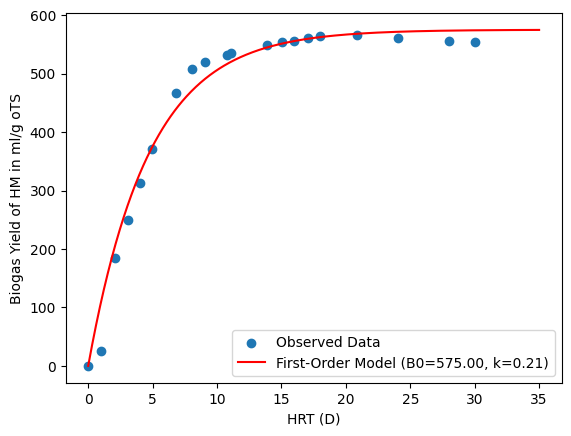

B(t) = 575.00 * (1 - exp(-0.21 * t))
R-squared: 0.9800393127214109
RMSE: 25.328118742143335


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# First-order kinetic model function
def first_order_model(t, B0, k):
    return B0 * (1 - np.exp(-k * t))
# Calling data
t_data = data[' HRT (d) '].values
B_data = data[' HM (ml/g oTS) '].values

# Curve fitting to find B0 and k
popt, pcov = curve_fit(first_order_model, t_data, B_data, bounds=([0, 0], [575, 0.75]), maxfev = 50000)
B0, k = popt

# Generate predictions
t_pred = np.linspace(0, 35, 575)
B_pred = first_order_model(t_pred, B0, k)

# Plot results
plt.scatter(t_data, B_data, label='Observed Data')
plt.plot(t_pred, B_pred, label=f'First-Order Model (B0={B0:.2f}, k={k:.2f})', color='red')
plt.xlabel('HRT (D)')
plt.ylabel('Biogas Yield of HM in ml/g oTS')
plt.legend()
plt.show()
model_equation = f'B(t) = {B0:.2f} * (1 - exp(-{k:.2f} * t))'
model_equation = f'B(t) = {B0:.2f} * (1 - exp(-{k:.2f} * t))'
print(model_equation)
# Statistical Evaluaton of the model
# R-squared
from sklearn.metrics import r2_score
r_squared = r2_score(B_data, first_order_model(t_data, *popt))
print(f"R-squared: {r_squared}")
# Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(B_data, first_order_model(t_data, *popt)))
print(f"RMSE: {rmse}")



In [ ]:
# Applying the modified Gompertz Level

In [ ]:
print ("Modified Gompert Model Codes")

Modified Gompert Model Codes


In [ ]:
# Importing useful libraries
from scipy.optimize import curve_fit

In [ ]:
# Function
def gompertz_model(t, B0, Rm, lambda_):
    return B0 * np.exp(-np.exp((Rm * np.e / B0) * (lambda_ - t) + 1))

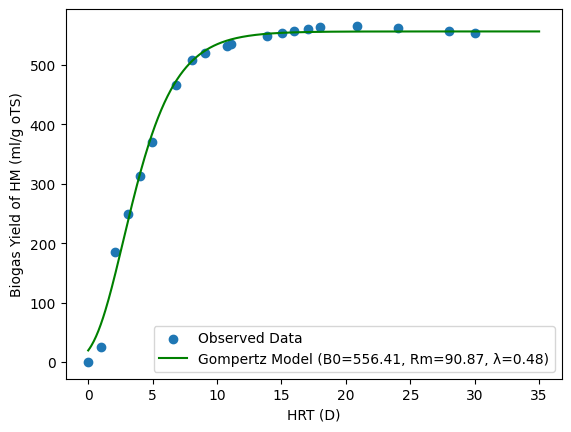

B(t) = 556.41 * exp(-exp((90.87 * e / 556.41) * (0.48 - t) + 1))
R-squared: 0.9936757076096282
RMSE: 14.256770496189056


In [ ]:
# Data Description
# HRT as Independent Variable
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
data = data
cleaned_data = data.dropna()
t_data = data[' HRT (d) '].values
# Biogas Yield as Depedent Variable: Biogas Yield of HM (ml/g oTS)
B_data = data[' HM (ml/g oTS) '].values
# Applying the fit
popt, pcov = curve_fit(gompertz_model, t_data, B_data, bounds=(0, [575, 100, 7]), maxfev = 50000)
B0, Rm, lambda_ = popt
# Generate predictions
t_pred = np.linspace(0, 35, 575)
B_pred = gompertz_model(t_pred, B0, Rm, lambda_)
# Plot results
plt.scatter(t_data, B_data, label='Observed Data')
plt.plot(t_pred, B_pred, label=f'Gompertz Model (B0={B0:.2f}, Rm={Rm:.2f}, λ={lambda_:.2f})', color='green')
plt.xlabel('HRT (D)')
plt.ylabel('Biogas Yield of HM (ml/g oTS)')
plt.legend()
plt.show()
def model_equation():
    return f'B(t) = {B0:.2f} * exp(-exp(({Rm:.2f} * e / {B0:.2f}) * ({lambda_:.2f} - t) + 1))'
print(model_equation())
# Statistical Evaluaton of the model
# R-squared
from sklearn.metrics import r2_score
r_squared = r2_score(B_data, gompertz_model(t_data, *popt))
print(f"R-squared: {r_squared}")
# Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(B_data, gompertz_model(t_data, *popt)))
print(f"RMSE: {rmse}")

B(t) = (566.19 * (1 - np.exp(-0.31 * t)) + 566.19 * np.exp(-np.exp((70.00 * e / 566.19) * ((0.82 -t)+ 1))))/2


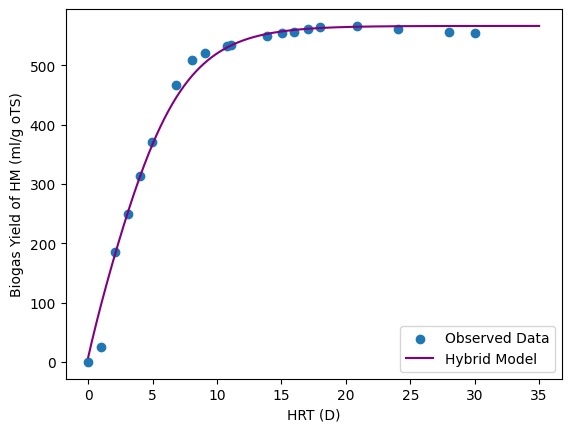


R-squared: 0.9893247660109606
RMSE: 18.522682809906225


In [ ]:
# Hybrid model function (blending First-Order and Gompertz)
def hybrid_model(t, B0, k, Rm, lambda_):
    first_order = B0 * (1 - np.exp(-k * t))
    gompertz = B0 * np.exp(-np.exp((Rm * np.e / B0) * (lambda_ - t) + 1))
    return (first_order + gompertz) / 2  # Averaging both models
def hybrid_model_equation():
    return f'B(t) = 0.5 * ({B0:.2f} * (1 - exp(-{k:.2f} * t)) + {B0:.2f} * exp(-exp(({Rm:.2f} * e / {B0:.2f}) * ({lambda_:.2f} - t) + 1))))'
# Calling data
t_data = data[' HRT (d) '].values
B_data = data[' HM (ml/g oTS) '].values

# Curve fitting for hybrid model
popt, pcov = curve_fit(hybrid_model, t_data, B_data, bounds=(0, [585, 100, 70, 40]), maxfev = 50000)
B0, k, Rm, lambda_ = popt

# Generate predictions
t_pred = np.linspace(0,35, 575)
B_pred = hybrid_model(t_pred, B0, k, Rm, lambda_)

# Plot results
plt.scatter(t_data, B_data, label='Observed Data')
plt.plot(t_pred, B_pred, label=f'Hybrid Model', color='purple')
plt.xlabel('HRT (D)')
plt.ylabel('Biogas Yield of HM (ml/g oTS)')
model_equation = f'B(t) = ({B0:.2f} * (1 - np.exp(-{k:.2f} * t)) + {B0:.2f} * np.exp(-np.exp(({Rm:.2f} * e / {B0:.2f}) * (({lambda_:.2f} -t)+ 1))))/2'
print(model_equation)
plt.legend()
plt.show()
print ()
# Statistical Evaluaton of the model
# R-squared
from sklearn.metrics import r2_score
r_squared = r2_score(B_data, hybrid_model(t_data, B0, k, Rm, lambda_))
print(f"R-squared: {r_squared}")
# Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(B_data, hybrid_model(t_data, B0, k, Rm, lambda_)))
print(f"RMSE: {rmse}")

In [ ]:
# Composite graph

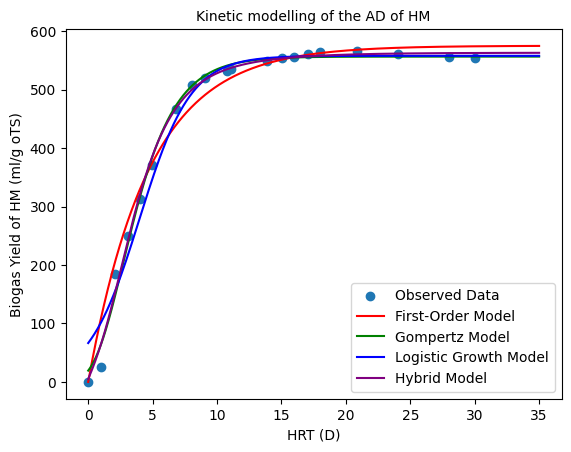

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

# Assuming 'data' DataFrame is already loaded and contains ' HRT (d) ' and ' HM (ml/g oTS) '

# Define the model functions
def first_order_model(t, B0, k):
    return B0 * (1 - np.exp(-k * t))

def gompertz_model(t, B0, Rm, lambda_):
    return B0 * np.exp(-np.exp((Rm * np.e / B0) * (lambda_ - t) + 1))

def logistic_growth_model(t, B0, Rm, lambda_):
    return B0 / (1 + np.exp((4 * Rm / B0) * (lambda_ - t) + 2))

def hybrid_model(t, B0_fo, k, B0_g, Rm, lambda_):
    first_order = B0_fo * (1 - np.exp(-k * t))
    gompertz = B0_g * np.exp(-np.exp((Rm * np.e / B0_g) * (lambda_ - t) + 1))
    return (first_order + gompertz) / 2  # Averaging both models


# Calling data
t_data = data[' HRT (d) '].values
B_data = data[' HM (ml/g oTS) '].values

# Curve fitting for each model
# First-order
popt_fo, pcov_fo = curve_fit(first_order_model, t_data, B_data, bounds=([0, 0], [575, 0.75]), maxfev = 50000)
B0_fo, k = popt_fo

# Gompertz
popt_g, pcov_g = curve_fit(gompertz_model, t_data, B_data, bounds=(0, [575, 100, 7]), maxfev = 50000)
B0_g, Rm, lambda_ = popt_g

# Logistic growth
popt_lg, pcov_lg = curve_fit(logistic_growth_model, t_data, B_data, bounds=(0, [575, 70, 7]))
B0_lg, Rm_lg, lambda_lg = popt_lg

# Hybrid
initial_guesses_hybrid = [B0_fo, k, B0_g, Rm, lambda_]
popt_hybrid, pcov_hybrid = curve_fit(hybrid_model, t_data, B_data, p0=initial_guesses_hybrid, maxfev=50000)
B0_fo_h, k_h, B0_g_h, Rm_h, lambda_h = popt_hybrid


# Generate predictions
t_pred = np.linspace(0, 35, 575)
B_pred_fo = first_order_model(t_pred, B0_fo, k)
B_pred_g = gompertz_model(t_pred, B0_g, Rm, lambda_)
B_pred_lg = logistic_growth_model(t_pred, B0_lg, Rm_lg, lambda_lg)
B_pred_hybrid = hybrid_model(t_pred, B0_fo_h, k_h, B0_g_h, Rm_h, lambda_h)


# Plot results
plt.scatter(t_data, B_data, label='Observed Data')
plt.plot(t_pred, B_pred_fo, label='First-Order Model', color='red')
plt.plot(t_pred, B_pred_g, label='Gompertz Model', color='green')
plt.plot(t_pred, B_pred_lg, label='Logistic Growth Model', color='blue')
plt.plot(t_pred, B_pred_hybrid, label='Hybrid Model', color='purple')


plt.xlabel('HRT (D)', fontsize=10)
plt.ylabel('Biogas Yield of HM (ml/g oTS)', fontsize=10)
plt.title('Kinetic modelling of the AD of HM', fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [ ]:
# Two-phase exponential model for HM

B(t) = 280.35 * (1 - exp(-0.21 * t)) + 297.23 * (1 - exp(-0.21 * t))


<ipython-input-34-6807c802d843>:3: RuntimeWarning: overflow encountered in exp
  return B1 * (1 - np.exp(-k1 * t)) + B2 * (1 - np.exp(-k2 * t))


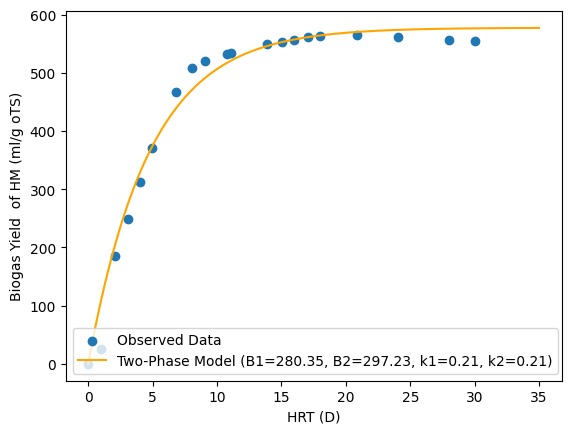

R-squared: 0.980110694420951
RMSE: 25.28279005668811


In [ ]:
# Two-phase exponential model function
def two_phase_model(t, B1, B2, k1, k2):
    return B1 * (1 - np.exp(-k1 * t)) + B2 * (1 - np.exp(-k2 * t))
def two_phase_model_equation():
    return f'B(t) = {B1:.2f} * (1 - exp(-{k1:.2f} * t)) + {B2:.2f} * (1 - exp(-{k2:.2f} * t))'

# Calling data
t_data = data[' HRT (d) '].values
B_data = data[' HM (ml/g oTS) '].values

# Curve fitting to find B1, B2, k1, and k2
popt, pcov = curve_fit(two_phase_model, t_data, B_data)
B1, B2, k1, k2 = popt

# Generate predictions
t_pred = np.linspace(0, 35, 585)
B_pred = two_phase_model(t_pred, B1, B2, k1, k2)

# Plot results
plt.scatter(t_data, B_data, label='Observed Data')
plt.plot(t_pred, B_pred, label=f'Two-Phase Model (B1={B1:.2f}, B2={B2:.2f}, k1={k1:.2f}, k2={k2:.2f})', color='orange')
plt.xlabel('HRT (D)')
plt.ylabel('Biogas Yield  of HM (ml/g oTS)')
print (two_phase_model_equation())
plt.legend()
plt.show()
# Statistical Evaluaton of the model
# R-squared
from sklearn.metrics import r2_score
r_squared = r2_score(B_data, two_phase_model(t_data, B1, B2, k1, k2))
print(f"R-squared: {r_squared}")
# Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(B_data,  two_phase_model(t_data, B1, B2, k1, k2)))
print(f"RMSE: {rmse}")


In [ ]:
# Logistic growth model for HM

B(t) = 557.74 / (1 + np.exp((4 * 70.00 / 557.74) * (0.00 - t) + 2))


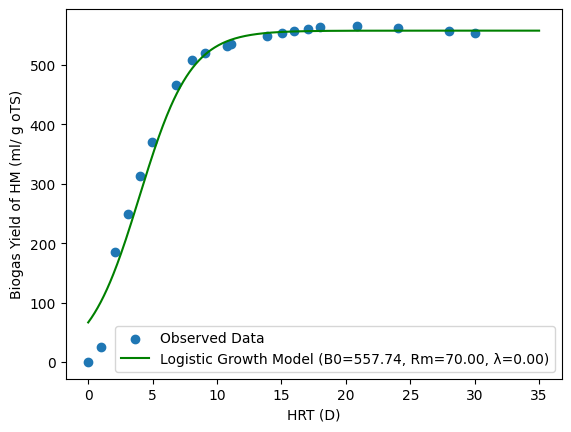

R-squared: 0.9772298920127361
RMSE: 27.05189750944702


In [ ]:
# Logistic growth model function
def logistic_growth_model(t, B0, Rm, lambda_):
    return B0 / (1 + np.exp((4 * Rm / B0) * (lambda_ - t) + 2))
def logistic_growth_model_equation():
    return f'B(t) = {B0:.2f} / (1 + np.exp((4 * {Rm:.2f} / {B0:.2f}) * ({lambda_:.2f} - t) + 2))'

# Calling data
t_data = data[' HRT (d) '].values
B_data = data[' HM (ml/g oTS) '].values

# Curve fitting to find B0, Rm, and lambda_
popt, pcov = curve_fit(logistic_growth_model, t_data, B_data, bounds=(0, [575, 70, 7]))
B0, Rm, lambda_ = popt

# Generate predictions
t_pred = np.linspace(0, 35, 575)
B_pred = logistic_growth_model(t_pred, B0, Rm, lambda_)

# Plot results
plt.scatter(t_data, B_data, label='Observed Data')
plt.plot(t_pred, B_pred, label=f'Logistic Growth Model (B0={B0:.2f}, Rm={Rm:.2f}, λ={lambda_:.2f})', color='green')
plt.xlabel('HRT (D)')
plt.ylabel('Biogas Yield of HM (ml/ g oTS)')
print (logistic_growth_model_equation())
plt.legend()
plt.show()
# Statistical Evaluaton of the model
# R-squared
from sklearn.metrics import r2_score
r_squared = r2_score(B_data, logistic_growth_model(t_data, B0, Rm, lambda_))
print(f"R-squared: {r_squared}")
# Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(B_data,  logistic_growth_model(t_data, B0, Rm, lambda_)))
print(f"RMSE: {rmse}")


In [ ]:
# Come to this and actually see how you can rather better it and validate

In [ ]:
# Modelling Biogas Yield of HM using Hybrid'' Modelling